In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import random
import math
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import model_from_json
from keras.models import load_model
from keras.utils import plot_model
import h5py
from ann_visualizer.visualize import ann_viz

/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/Users/megumisano/anaconda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/Users/megumisano/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve 

loading dataframes

In [585]:
# train scores when training with teacher 
with_teacher_train = pd.read_csv('with_teacher_train.csv')
with_teacher_train = with_teacher_train.drop('Unnamed: 0', axis = 1)
# train scores when training without teacher 
without_teacher_train = pd.read_csv('without_teacher_train.csv')
without_teacher_train = without_teacher_train.drop('Unnamed: 0', axis = 1)

In [586]:
test_all = pd.read_csv('test_all.csv')
test_all = test_all.drop('Unnamed: 0', axis = 1)
test_teachers = pd.read_csv('test_teachers.csv')
test_teachers = test_teachers.drop('Unnamed: 0', axis = 1)

In [577]:
###############################
## Analysis helper functions ##
###############################
from scipy import optimize
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

def test_func(x, a, b):
    return a * x + b 

def plot_train(y, color, xlabel, ylabel, withLine):
    plt.figure(figsize=(7.5,5))
    params, params_covariance = optimize.curve_fit(test_func, range(len(y)), y, p0=[2, 2])
    print(params)
    sns.lineplot(x=range(len(y)), y=y,  color = color)
    plt.gca().set_ylim(-3500, 100)
    plt.plot(range(len(y)), test_func(range(len(y)), params[0], params[1]), range(len(y)), y, color = color, linewidth = 3)
    plt.show()
    
def stats(y):
    X = range(len(y))
    y = y
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())
    
def line_plot_test(df):
    plt.figure(figsize=(10,5))
    sns.lineplot(data=df, x='game_num', y='test_score', hue='condition')
    plt.plot(range(len(y)), test_func(range(len(y)), params[0], params[1]), range(len(y)), y, color = color, linewidth = 3)
    plt.show()
    
def bar_plot_test(df, x, y, palette):
    plt.figure(figsize=(6,5))
#     plt.gca().set_ylim(-1800, 0)
    sns.barplot(data=df, x=x, y=y, palette=palette, errwidth=1, capsize=0.1)
    plt.show() # '#ef945f', 

### Training analysis

[    3.74899038 -1612.35263537]


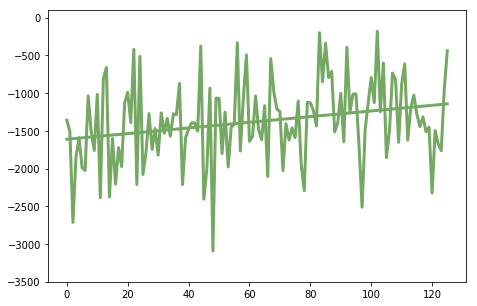

In [534]:
plot_train(list(without_teacher_train['train_scores']), '#75a863', 'games', 'train scores without teacher', True)

In [467]:
stats(list(without_teacher_train['train_scores'])) 
# with_teacher_train_grouped = with_teacher_train.groupby(np.arange(len(with_teacher_train))//5).median()

[    3.30477871 -1415.73652264]


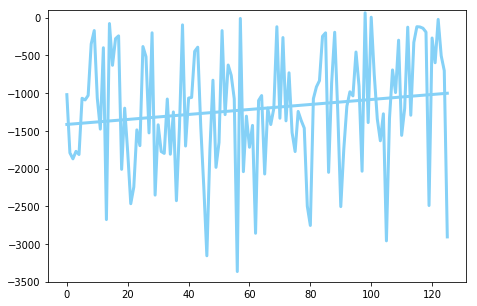

In [478]:
plot_train(list(with_teacher_train['train_scores'])[:126], '#85d1f7', 'games', 'train scores with teacher', True)

In [511]:
stats(list(with_teacher_train['train_scores'])[:126]) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.978
Date:                Wed, 12 Dec 2018   Prob (F-statistic):             0.0869
Time:                        19:36:13   Log-Likelihood:                -1017.1
No. Observations:                 126   AIC:                             2038.
Df Residuals:                     124   BIC:                             2044.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1415.7365    138.473    -10.224      0.0

### Testing analysis

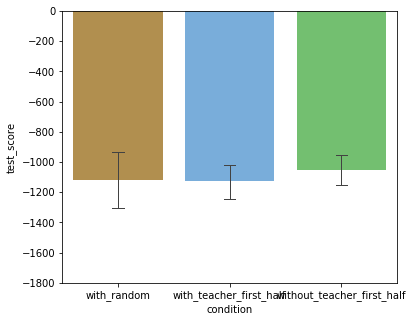

In [567]:
bar_plot_test(test_all, 'condition', 'test_score', palette = ['#c1943f', '#69aeea', '#67cc63']) 

##### Randomized teacher performance across experience

In [530]:
test_with_random = test_all[test_all['condition'] == 'with_random']
test_with_random['student'] =  [i//10 for i in range(50)]
bar_plot_test(test_with_random, 'student', 'test_score', palette = "OrRd")

/Users/megumisano/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [525]:
test_with_random_student_means = test_with_random.groupby(np.arange(len(test_with_random))//10).median()['test_score']
stats(test_with_random_student_means)

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     3.712
Date:                Wed, 12 Dec 2018   Prob (F-statistic):              0.150
Time:                        20:24:36   Log-Likelihood:                -34.693
No. Observations:                   5   AIC:                             73.39
Df Residuals:                       3   BIC:                             72.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -713.8443    249.536     -2.861      0.0

/Users/megumisano/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


##### Without teacher performance across experience

In [509]:
test_without_teacher = test_teachers[test_teachers['condition'] == 'without_teacher']
test_without_teacher['student'] = [i//25 for i in range(250)]
bar_plot_test(test_without_teacher, 'student', 'test_score', palette="YlGn")

/Users/megumisano/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [517]:
test_without_teacher_student_means = test_without_teacher.groupby(np.arange(len(test_without_teacher))//25).median()['test_score']
stats(test_without_teacher_student_means)

##### With RL teacher performance across experience

In [561]:
test_with_teacher = test_teachers[test_teachers['condition'] == 'with_teacher']
test_with_teacher['student'] = [i//25 for i in range(250)]
bar_plot_test(test_with_teacher, 'student', 'test_score', palette="GnBu")

/Users/megumisano/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [563]:
test_with_teacher_student_means = test_with_teacher.groupby(np.arange(len(test_with_teacher))//25).median()['test_score']
stats(test_with_teacher_student_means)

                            OLS Regression Results                            
Dep. Variable:             test_score   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1.952
Date:                Wed, 12 Dec 2018   Prob (F-statistic):              0.200
Time:                        23:33:20   Log-Likelihood:                -62.824
No. Observations:                  10   AIC:                             129.6
Df Residuals:                       8   BIC:                             130.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1098.8757     85.081    -12.916      0.0

/Users/megumisano/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


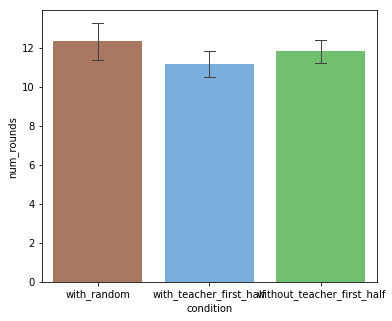

In [594]:
### number of rounds 
bar_plot_test(test_all, 'condition', 'num_rounds', palette = ['#b27357', '#69aeea', '#67cc63']) # just get the first half of without_teacher 

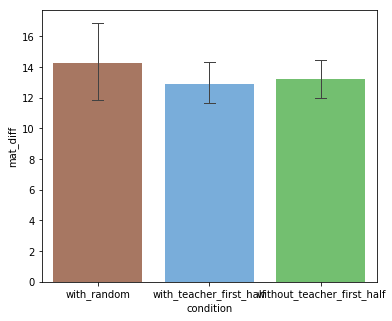

In [596]:
# material differences 
bar_plot_test(test_all, 'condition', 'mat_diff', palette = ['#b27357', '#69aeea', '#67cc63']) # just get the first half of without_teacher 

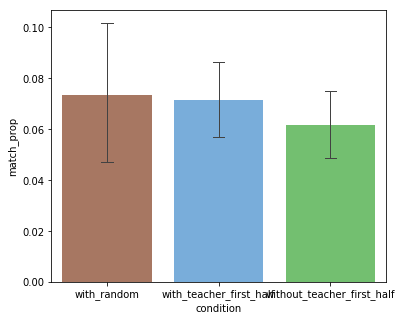

In [597]:
# proportion of optimal moves 
bar_plot_test(test_all, 'condition', 'match_prop', palette = ['#b27357', '#69aeea', '#67cc63']) # just get the first half of without_teacher 

## supplementary analysis

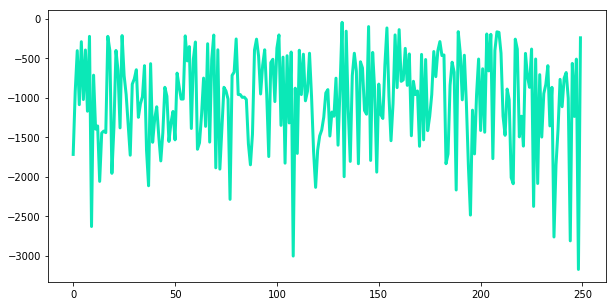

In [300]:
### TEST SCORES 
plt.figure(figsize=(10,5))
plt.plot(range(len(without_teacher_test_scores)), without_teacher_test_scores, color = '#0be8b7', linewidth = 3)
plt.show()

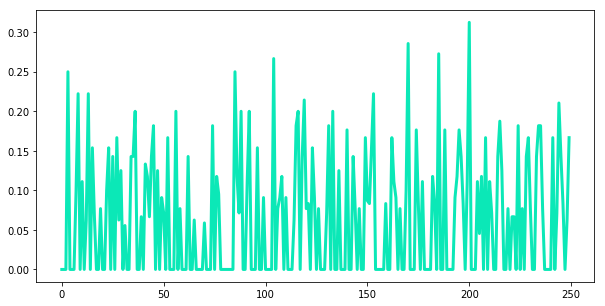

In [301]:
### MATCHES 
plt.figure(figsize=(10,5))
plt.plot(range(len(without_teacher_test_matches)), without_teacher_test_matches, color = '#0be8b7', linewidth = 3)
plt.show()

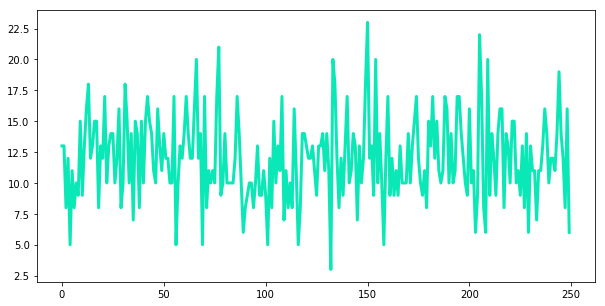

In [302]:
### ROUNDS
plt.figure(figsize=(10,5))
plt.plot(range(len(without_teacher_test_rounds)), without_teacher_test_rounds, color = '#0be8b7', linewidth = 3)
plt.show()

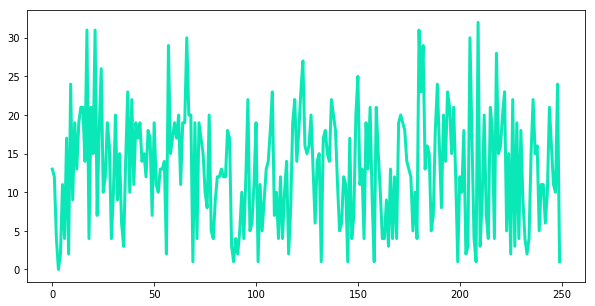

In [303]:
### MATERIAL DIFFERENCES
plt.figure(figsize=(10,5))
plt.plot(range(len(without_teacher_test_material)), without_teacher_test_material, color = '#0be8b7', linewidth = 3)
plt.show()